gradient de Sobel échantillon

Le programme a mis 111.58376836776733 secondes à s'exécuter.


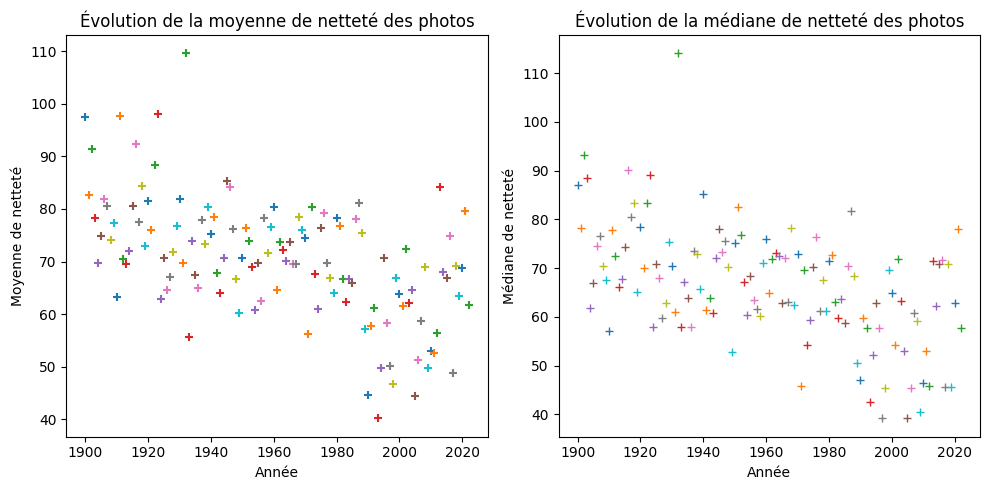

In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon'

# Création des listes pour stocker les années et les mesures de netteté
annees = []
nettetes = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Chargement de l'image avec OpenCV
        img = cv2.imread(chemin_fichier)
        # Conversion de l'image en niveaux de gris
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calcul de la netteté de l'image
        gradient_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
        gradient_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
        sharpness = gradient_magnitude.mean()
        # Ajout de l'année et de la netteté aux listes correspondantes
        annees.append(annee)
        nettetes.append(sharpness)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de netteté pour chaque année
moyennes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in moyennes_nettete:
        moyennes_nettete[annee].append(nettete)
    else:
        moyennes_nettete[annee] = [nettete]

# Calcul de la médiane de netteté pour chaque année
medianes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in medianes_nettete:
        medianes_nettete[annee].append(nettete)
    else:
        medianes_nettete[annee] = [nettete]
        
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de netteté en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes in moyennes_nettete.items():
    moyenne = np.mean(moyennes)
    plt.scatter(annee, moyenne, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne de netteté')
plt.title('Évolution de la moyenne de netteté des photos')

# Création du graphe de la médiane de netteté en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes in medianes_nettete.items():
    mediane = np.median(medianes)
    plt.plot(annee, mediane, marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane de netteté')
plt.title('Évolution de la médiane de netteté des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


laplacien sharpness neergy échantillon

Le programme a mis 91.79453325271606 secondes à s'exécuter.


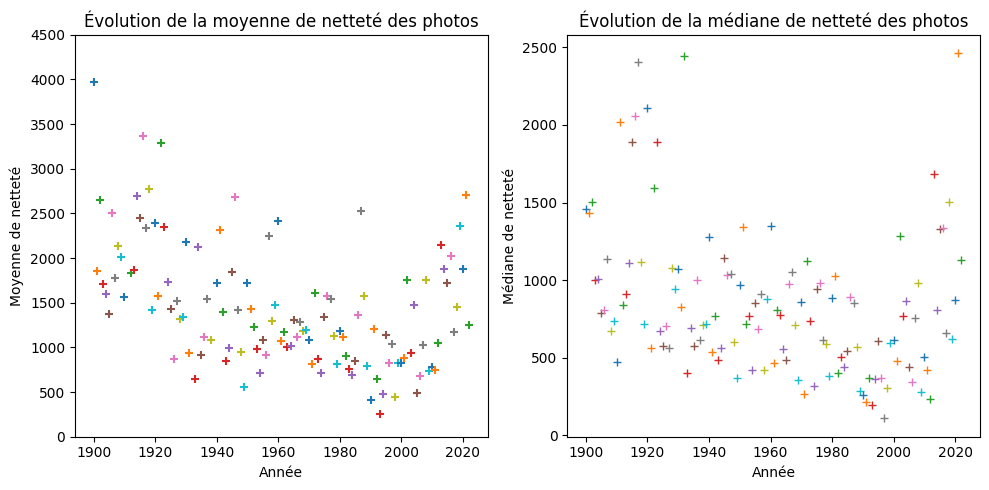

In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

def calculate_sharpness(image_path):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    # Conversion de l'image en niveaux de gris
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calcul du Laplacien de l'image
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Calcul de l'énergie de netteté
    sharpness = np.mean(laplacian**2)
    return sharpness

temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon'

# Création des listes pour stocker les années et les mesures de netteté
annees = []
nettetes = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Calcul de la netteté de l'image
        sharpness = calculate_sharpness(chemin_fichier)
        # Ajout de l'année et de la netteté aux listes correspondantes
        annees.append(annee)
        nettetes.append(sharpness)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de netteté pour chaque année
moyennes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in moyennes_nettete:
        moyennes_nettete[annee].append(nettete)
    else:
        moyennes_nettete[annee] = [nettete]

# Calcul de la médiane de netteté pour chaque année
medianes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in medianes_nettete:
        medianes_nettete[annee].append(nettete)
    else:
        medianes_nettete[annee] = [nettete]

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de netteté en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes in moyennes_nettete.items():
    moyenne = np.mean(moyennes)
    plt.scatter(annee, moyenne, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne de netteté')
plt.title('Évolution de la moyenne de netteté des photos')
plt.ylim(0, 4500)  # Définition des limites de l'axe y

# Création du graphe de la médiane de netteté en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes in medianes_nettete.items():
    mediane = np.median(medianes)
    plt.plot(annee, mediane, marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane de netteté')
plt.title('Évolution de la médiane de netteté des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


filtre de Laplace échantillon

Le programme a mis 82.69002652168274 secondes à s'exécuter.


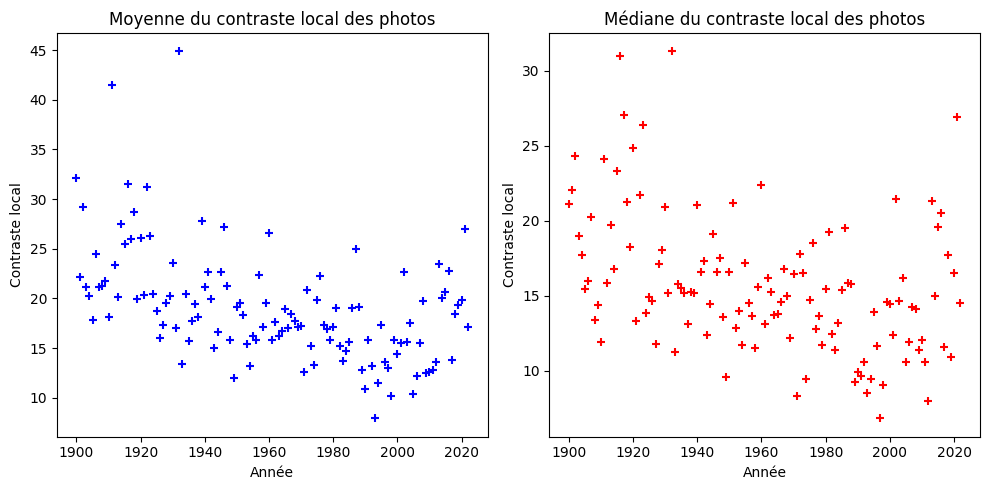

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

def calculate_local_contrast(image_path):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    # Conversion de l'image en niveaux de gris
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Application du filtre de Laplace
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Calcul du contraste local
    local_contrast = np.abs(laplacian).mean()
    return local_contrast

temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon'

# Création des listes pour stocker les années et les mesures de contraste local
annees = []
contrastes_locaux = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Calcul du contraste local de l'image
        contraste_local = calculate_local_contrast(chemin_fichier)
        # Ajout de l'année et du contraste local aux listes correspondantes
        annees.append(annee)
        contrastes_locaux.append(contraste_local)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de contraste local pour chaque année
moyennes_contraste_local = {}
for annee, contraste_local in zip(annees, contrastes_locaux):
    if annee in moyennes_contraste_local:
        moyennes_contraste_local[annee].append(contraste_local)
    else:
        moyennes_contraste_local[annee] = [contraste_local]

# Calcul de la médiane de contraste local pour chaque année
medianes_contraste_local = {}
for annee, contraste_local in zip(annees, contrastes_locaux):
    if annee in medianes_contraste_local:
        medianes_contraste_local[annee].append(contraste_local)
    else:
        medianes_contraste_local[annee] = [contraste_local]

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de contraste local en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes in moyennes_contraste_local.items():
    moyenne = np.mean(moyennes)
    plt.scatter(annee, moyenne, marker='+', color='blue')
plt.xlabel('Année')
plt.ylabel('Contraste local')
plt.title('Moyenne du contraste local des photos')

# Création du graphe de la médiane de contraste local en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes in medianes_contraste_local.items():
    mediane = np.median(medianes)
    plt.scatter(annee, mediane, marker='+', color='red')
plt.xlabel('Année')
plt.ylabel('Contraste local')
plt.title('Médiane du contraste local des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


In [ ]:
IMPORTS 0 FAIRE !!!!!!!!!!!!!!!!!!

In [ ]:
import pickle
with open('moyenne_sobel.pkl', 'wb') as fichier:
    pickle.dump(moyenne_sobel, fichier)
with open('moyenne_sharpness.pkl', 'wb') as fichier:
    pickle.dump(moyenne_sharpness, fichier)
with open('moyenne_laplace.pkl', 'wb') as fichier:
    pickle.dump(moyenne_laplace, fichier) 

gradient sobel dossier entier

In [ ]:
f par f

Le programme a mis 404.5694479942322 secondes à s'exécuter.


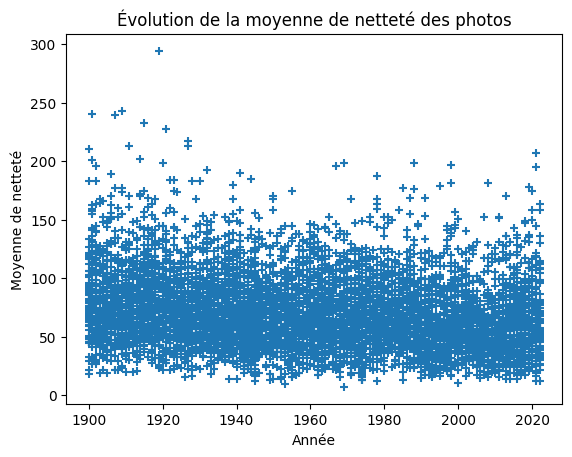

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les années et les mesures de netteté
annees = []
nettetes = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Chargement de l'image avec OpenCV
        img = cv2.imread(chemin_fichier)
        # Conversion de l'image en niveaux de gris
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calcul de la netteté de l'image
        gradient_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
        gradient_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
        sharpness = gradient_magnitude.mean()
        # Ajout de l'année et de la netteté aux listes correspondantes
        annees.append(annee)
        nettetes.append(sharpness)
    else:
        print('pas la bonne extension')
"""
# Calcul de la moyenne de netteté pour chaque année
moyennes_nettete_sobel = {}
for annee, nettete in zip(annees, nettetes):
    if annee in moyennes_nettete_sobel:
        moyennes_nettete_sobel[annee].append(nettete)
    else:
        moyennes_nettete_sobel[annee] = [nettete]"""
"""
# Calcul de la médiane de netteté pour chaque année
medianes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in medianes_nettete:
        medianes_nettete[annee].append(nettete)
    else:
        medianes_nettete[annee] = [nettete]
        """
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")
plt.scatter(annees, nettetes, marker='+')
"""
# Création du graphe de la moyenne de netteté en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes_sobel in moyennes_nettete_sobel.items():
    moyenne_sobel = np.mean(moyennes_sobel)
    plt.scatter(annee, moyenne_sobel, marker='+')"""
plt.xlabel('Année')
plt.ylabel('Moyenne de netteté')
plt.title('Évolution de la moyenne de netteté des photos')
"""
# Création du graphe de la médiane de netteté en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes_sobel in medianes_nettete_sobel.items():
    mediane_sobel = np.median(medianes_sobel)
    plt.plot(annee, mediane, marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane de netteté')
plt.title('Évolution de la médiane de netteté des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()
"""
# Affichage des graphiques
plt.show()


In [3]:
len(nettetes)


7543

In [4]:
import pickle
with open('donnees_nettete.pkl', 'wb') as fichier:
    pickle.dump(nettetes, fichier)

laplacien sharpness energy dossier entier 

Le programme a mis 333.34894371032715 secondes à s'exécuter.


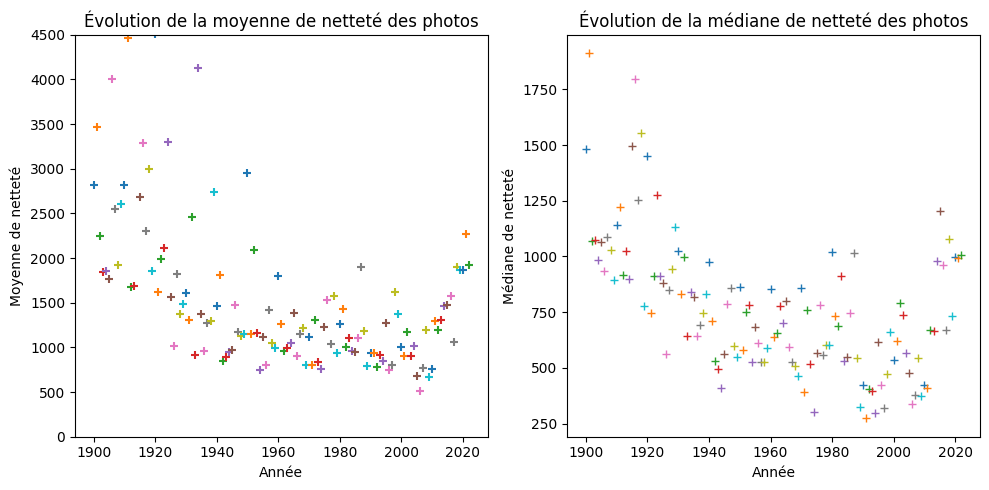

In [29]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

def calculate_sharpness(image_path):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    # Conversion de l'image en niveaux de gris
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calcul du Laplacien de l'image
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Calcul de l'énergie de netteté
    sharpness = np.mean(laplacian**2)
    return sharpness

temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les années et les mesures de netteté
annees = []
nettetes = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Calcul de la netteté de l'image
        sharpness = calculate_sharpness(chemin_fichier)
        # Ajout de l'année et de la netteté aux listes correspondantes
        annees.append(annee)
        nettetes.append(sharpness)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de netteté pour chaque année
moyennes_nettete_sharpness = {}
for annee, nettete in zip(annees, nettetes):
    if annee in moyennes_nettete_sharpness:
        moyennes_nettete_sharpness[annee].append(nettete)
    else:
        moyennes_nettete_sharpness[annee] = [nettete]

# Calcul de la médiane de netteté pour chaque année
medianes_nettete_sharpness = {}
for annee, nettete in zip(annees, nettetes):
    if annee in medianes_nettete_sharpness:
        medianes_nettete_sharpness[annee].append(nettete)
    else:
        medianes_nettete_sharpness[annee] = [nettete]

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de netteté en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes_sharpness in moyennes_nettete_sharpness.items():
    moyenne_sharpness = np.mean(moyennes_sharpness)
    plt.scatter(annee, moyenne_sharpness, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne de netteté')
plt.title('Évolution de la moyenne de netteté des photos')
plt.ylim(0, 4500)  # Définition des limites de l'axe y

# Création du graphe de la médiane de netteté en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes_sharpness in medianes_nettete_sharpness.items():
    mediane_sharpness = np.median(medianes_sharpness)
    plt.plot(annee, median_sharpnesse, marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane de netteté')
plt.title('Évolution de la médiane de netteté des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


filtre de Laplace entier 

Le programme a mis 346.6823024749756 secondes à s'exécuter.


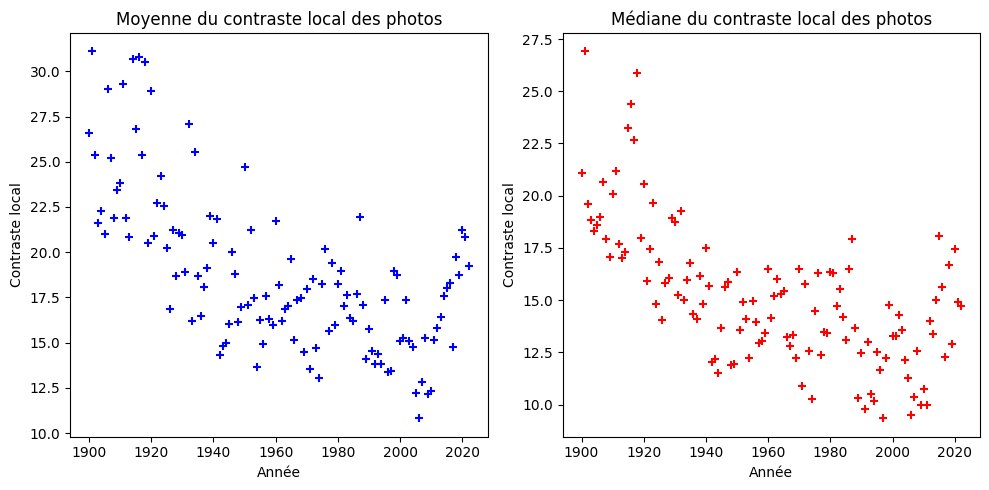

In [30]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

def calculate_local_contrast(image_path):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    # Conversion de l'image en niveaux de gris
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Application du filtre de Laplace
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Calcul du contraste local
    local_contrast = np.abs(laplacian).mean()
    return local_contrast

temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les années et les mesures de contraste local
annees = []
contrastes_locaux = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Calcul du contraste local de l'image
        contraste_local = calculate_local_contrast(chemin_fichier)
        # Ajout de l'année et du contraste local aux listes correspondantes
        annees.append(annee)
        contrastes_locaux.append(contraste_local)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de contraste local pour chaque année
moyennes_contraste_local_laplace = {}
for annee, contraste_local in zip(annees, contrastes_locaux):
    if annee in moyennes_contraste_local_laplace:
        moyennes_contraste_local_laplace[annee].append(contraste_local)
    else:
        moyennes_contraste_local_laplace[annee] = [contraste_local]

# Calcul de la médiane de contraste local pour chaque année
medianes_contraste_local = {}
for annee, contraste_local in zip(annees, contrastes_locaux):
    if annee in medianes_contraste_local:
        medianes_contraste_local[annee].append(contraste_local)
    else:
        medianes_contraste_local[annee] = [contraste_local]

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de contraste local en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes_laplace in moyennes_contraste_local_laplace.items():
    moyenne_laplace = np.mean(moyennes_laplace)
    plt.scatter(annee, moyenne_laplace, marker='+', color='blue')
plt.xlabel('Année')
plt.ylabel('Contraste local')
plt.title('Moyenne du contraste local des photos')

# Création du graphe de la médiane de contraste local en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes_laplace in medianes_contraste_local_laplace.items():
    mediane_laplace = np.median(medianes_laplace)
    plt.scatter(annee, mediane_laplace, marker='+', color='red')
plt.xlabel('Année')
plt.ylabel('Contraste local')
plt.title('Médiane du contraste local des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()
